In [6]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [7]:
titanic_data = pd.read_csv("./train.csv")

In [8]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\vijay\AppData\Local\Temp\ipykernel_16420\2926113795.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr(),cmap="YlGnBu")


<Axes: >

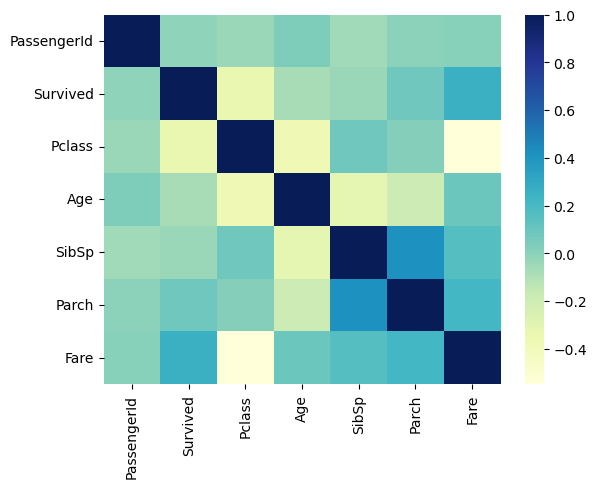

In [9]:
sns.heatmap(titanic_data.corr(),cmap="YlGnBu")

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2)

In [12]:
for train_indices , test_indices in split.split(titanic_data,titanic_data[["Survived","Pclass","Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set= titanic_data.loc[test_indices]

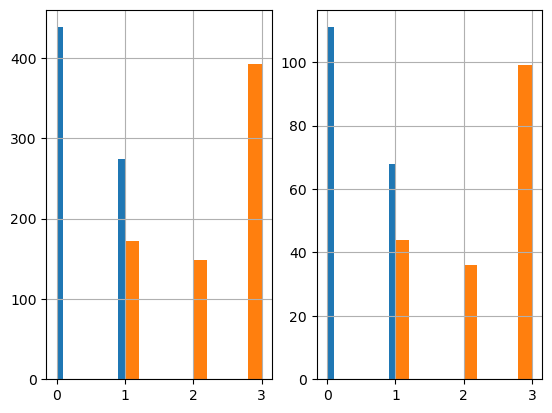

In [13]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [14]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 230 to 47
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          574 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        169 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [15]:
strat_train_set.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            138
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          543
Embarked         1
dtype: int64

In [16]:
strat_train_set['Age'].fillna(strat_train_set['Age'].mean(),inplace=True)

In [17]:
strat_train_set.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          543
Embarked         1
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
strat_train_set['Embarked'] = le.fit_transform(strat_train_set['Embarked'])


In [19]:
strat_train_set['Sex'] = le.fit_transform(strat_train_set['Sex'])

In [20]:
x = strat_train_set.drop(['Survived',"Ticket","Name","Cabin"],axis=1)
y = strat_train_set['Survived']

In [21]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
x_data = scaler.fit_transform(x)
y_data = y.to_numpy()

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [23]:
clf = RandomForestClassifier()
param_grid = [{"n_estimators":[10,100,200,500],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}]

grid_search = GridSearchCV(clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(x_data,y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [24]:
final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(min_samples_split=3)

In [25]:
strat_test_set
strat_test_set = strat_test_set.drop(['Name','Ticket','Cabin'],axis = 1)

In [26]:
strat_test_set['Sex'] = le.fit_transform(strat_test_set['Sex'])
strat_test_set['Embarked'] = le.fit_transform(strat_test_set['Embarked'])
strat_test_set['Age'].fillna(strat_train_set['Age'].mean(),inplace=True)

In [27]:
strat_test_set

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
38,39,0,3,0,18.0,2,0,18.0000,2
546,547,1,2,0,19.0,1,0,26.0000,2
348,349,1,3,1,3.0,1,1,15.9000,2
661,662,0,3,1,40.0,0,0,7.2250,0
622,623,1,3,1,20.0,1,1,15.7417,0
...,...,...,...,...,...,...,...,...,...
823,824,1,3,0,27.0,0,1,12.4750,2
190,191,1,2,0,32.0,0,0,13.0000,2
79,80,1,3,0,30.0,0,0,12.4750,2
393,394,1,1,0,23.0,1,0,113.2750,0


In [28]:
x_ = strat_test_set.drop("Survived",axis=1)
x_

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
38,39,3,0,18.0,2,0,18.0000,2
546,547,2,0,19.0,1,0,26.0000,2
348,349,3,1,3.0,1,1,15.9000,2
661,662,3,1,40.0,0,0,7.2250,0
622,623,3,1,20.0,1,1,15.7417,0
...,...,...,...,...,...,...,...,...
823,824,3,0,27.0,0,1,12.4750,2
190,191,2,0,32.0,0,0,13.0000,2
79,80,3,0,30.0,0,0,12.4750,2
393,394,1,0,23.0,1,0,113.2750,0


In [29]:
y_=strat_test_set["Survived"]

In [30]:
y_

38     0
546    1
348    1
661    0
622    1
      ..
823    1
190    1
79     1
393    1
398    0
Name: Survived, Length: 179, dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
x_test = scaler.fit_transform(x_)

In [33]:
y_test = y_.to_numpy()

In [34]:
final_clf.score(x_test,y_test)

0.8547486033519553

In [35]:
## Full train 

In [50]:
data =titanic_data

In [51]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
data = data.drop(["Name","Ticket","Cabin"],axis=1)

In [53]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [54]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [55]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [60]:
data['Embarked'] = le.fit_transform(data['Embarked'])
data['Sex'] = le.fit_transform(data["Sex"])

In [61]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [62]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


In [71]:
x=data.drop(['Survived'],axis=1)
y=data['Survived']
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2


In [72]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
x_final = scaler.fit_transform(x)
y_final = y.to_numpy()

In [75]:
clf = RandomForestClassifier()

In [76]:
clf.fit(x_final,y_final)

RandomForestClassifier()

In [107]:
titanic_test_data = pd.read_csv("./test.csv")

In [108]:
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [109]:
titanic_test_data= titanic_test_data.drop(["Name","Ticket","Cabin"],axis=1)
titanic_test_data['Age'].fillna( titanic_test_data['Age'].mean(),inplace=True)
titanic_test_data['Embarked'] = le.fit_transform(titanic_test_data['Embarked'])
titanic_test_data['Sex'] = le.fit_transform( titanic_test_data["Sex"])

In [110]:
titanic_test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.50000,0,0,7.8292,1
1,893,3,0,47.00000,1,0,7.0000,2
2,894,2,1,62.00000,0,0,9.6875,1
3,895,3,1,27.00000,0,0,8.6625,2
4,896,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,8.0500,2
414,1306,1,0,39.00000,0,0,108.9000,0
415,1307,3,1,38.50000,0,0,7.2500,2
416,1308,3,1,30.27259,0,0,8.0500,2


In [114]:
x_test= titanic_test_data
x_test.isna().sum()
x_test = x_test.fillna(method="ffill")

In [115]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
x_test_data = scaler.fit_transform(x_test)

In [116]:
clf.predict(x_test_data)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [117]:
check_df = pd.DataFrame(titanic_test_data['PassengerId'])
check_df['Survived']=clf.predict(x_test_data)
check_df.to_csv("./check.csv",index=False)